# Physics of Stars Computer Project

### Anna Esselink (s4149653)
### Maria Dziouba (s3950425)

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>")) #Uncomment these lines for fullscreen mode :)

import numpy as np
from matplotlib.pyplot import figure, show, ylim
from scipy.interpolate import interp2d
import seaborn as sns
#Import other prerequisites here

## Abstract

In this project...

## Part 1 - Reading & Interpolating Data

This part uses tables from the Opacity Project. Read the file **opacity_tables.tab**, which will explain what each table is for. You will see files named **table_xx_edited.txt** on Nestor. These are the necessary tables for this section (with **xx** corresponding to that table number in the opacity_tables file. The headers in these subfiles are removed for convenience. Note that you do not have all the data you need from just these files, and you may need to make some approximations with the data you are given. 

In [3]:
# Loading in data for necessary tables
# This is an "idiot-proof" way of doing it, feel free to do it in a nicer way  - original file is opacity_tables.tab
# Info on the tables also in opacity_tables.tab, so read that

# Tables loaded
opacity_OP_07_002 = np.loadtxt("table_73_edited.txt") 
opacity_OP_07_004 = np.loadtxt("table_75_edited.txt") 
opacity_OP_07_006 = np.loadtxt("table_76_edited.txt") 
opacity_OP_1 = np.loadtxt("table_115_edited.txt")

# Headers for interpolating (x-axis in table is logR, y-axis is logT)
logT_OP = [3.75, 3.8, 3.85, 3.9, 3.95, 4.0, 4.05, 4.1, 4.15, 4.2, 4.25, 4.3, 4.35, 4.4, 4.45, 4.5, 4.55, 4.6, 4.65, 4.7, 4.75, 4.8, 4.85, 4.9, 4.95, 5.0, 5.05, 5.1, 5.15, 5.2, 5.25, 5.3, 5.35, 5.4, 5.45, 5.5, 5.55, 5.6, 5.65, 5.7, 5.75, 5.8, 5.85, 5.9, 5.95, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0]
logR_OP = [-8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0]

In [16]:
# Interpolating data
# the way the tables are set up now, it works well with scipy.interpolate. 
# Write a very general interpolater to make it easier later.
sns.set_palette(sns.color_palette("hls", 4))

#table115 has X=1


f_1 = interp2d(logR_OP, logT_OP, opacity_OP_1)
f_002 = interp2d(logR_OP, logT_OP, opacity_OP_07_002)
f_004 = interp2d(logR_OP, logT_OP, opacity_OP_07_004)
f_006 = interp2d(logR_OP, logT_OP, opacity_OP_07_006)

#logR_plot = np.linspace(np.min(logR_OP), np.max(logR_OP), 10)
logT_plot = np.linspace(np.min(logT_OP), np.max(logT_OP), 100)
logR_plot = -3

opacity_plot_1 = f_1(logR_plot, logT_plot)
opacity_plot_002 = f_002(logR_plot, logT_plot)
opacity_plot_004 = f_004(logR_plot, logT_plot)
opacity_plot_006 = f_006(logR_plot, logT_plot)

# the opacity for Z=0.05 can be approximated by taking the mean of the interpolated
# functions of Z=0.04 and Z=0.06
opacity_plot_005 = np.mean([opacity_plot_004, opacity_plot_006], axis=0)




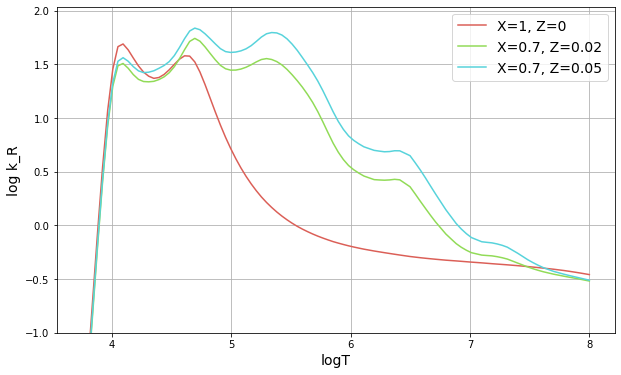

In [15]:
# Plotting data - Plot of κR vs log T

fig = figure(figsize=(10,6))
fr = fig.add_subplot(1,1,1)
fr.set_xlabel('logT', fontsize="14")
fr.set_ylabel('log k_R', fontsize="14")
fr.grid(True)
fr.plot(logT_plot, opacity_plot_1,"-", label = "X=1, Z=0")
fr.plot(logT_plot, opacity_plot_002,"-", label = "X=0.7, Z=0.02")
fr.plot(logT_plot, opacity_plot_005,"-", label = "X=0.7, Z=0.05")
#fr.plot(logT_plot, opacity_plot_006,"-", label = "X=0.7, Z=0.06")
#fr.plot(n, max_axis,"-", label="2.8V")
fr.legend(fontsize="14")
ylim(bottom=-1)
show()


#completely reproducing image 3.17 from the book, all three lines. 
# should be pretty much exactly the same. 
# do some algebra to get pressure

### Extension to T, P

explain why 1.3 ..

$P = \frac{kRT^410^{-18}}{\mu m_H}$

In [20]:
# define functions here to return T, P as you derived above
# eq 3.78, eq. 5.107

# first write R as a function of P, then interpolate over the newly obtained data
def logR(logP, logT):
    k = 1.380658e-16  #erg/K Boltzmann constant
    mu = 1.3 #average mass in m_H
    mH = 1.6735344e-24   #g, mass of 1H atom
    logR = -np.log10(k/(mu*mH)) + logP - 4*logT + 18
    return logR



### Extending the Interpolator

Here you will need the Grevesse and Noels tables. As before, an edited one without headers is given, but you are free to use the original data if you wish.

In [6]:
# Load new table, if you want to do this more elegantly the raw table is g7_02.tron
opacity_GN = np.loadtxt("g7_02_edited.tron")
opacity_GN = np.array(opacity_GN)

# Headers for this table
logT_GN = [4.5, 4.45, 4.4, 4.35, 4.3, 4.25, 4.2, 4.15, 4.1, 4.05, 4.0, 3.95, 3.9, 3.85, 3.8, 3.75, 3.7, 3.65, 3.6, 3.55, 3.5, 3.49, 3.48, 3.47, 3.46, 3.45, 3.44, 3.43, 3.42, 3.41, 3.4, 3.39, 3.38, 3.37, 3.36, 3.35, 3.34, 3.33, 3.32, 3.31, 3.3, 3.29, 3.28, 3.27, 3.26, 3.25, 3.24, 3.23, 3.22, 3.21, 3.2, 3.19, 3.18, 3.17, 3.16, 3.15, 3.14, 3.13, 3.12, 3.11, 3.1, 3.09, 3.08, 3.07, 3.06, 3.05, 3.04, 3.03, 3.02, 3.01, 3.0, 2.99, 2.98, 2.97, 2.96, 2.95, 2.94, 2.93, 2.92, 2.91, 2.9, 2.85, 2.8, 2.75, 2.7]
logR_GN = [-8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0]

# add data of the different temperature ranges, there is a overlap, can't take mean here
# 


# Interpolate this new table

In [7]:
# Plot of log T vs log kappa for new table only(sanity check)
# log is log10



# Plot of unsmoothed log T vs log kappa for both data sets (sanity check)

In [8]:
# Smooth transition in overlap region - think carefully here

# Plot overlap region for both data sets and your smoothed transition (sanity check)

# define function to return opacity over full range of log T, taking the correct value based on log T

## Part 2

### Derivation of T as a function of optical depth

You can use LaTeX math commands for derivations in a Juptyer notebook. Don't forget to state your assumptions.


### Discuss opacity approximation (independent of frequency and given by the Rosseland mean opacity.)


In [9]:
# Plot of T as a function of optical depth for region of interest - think about what you can show as a verification

### Derivation of the equation of hydrostatic equilibrium




### Starting value for pressure

In [10]:
# Integration for starting pressure values


# Plot of pressure as a function of optical depth.


# Plot of density as a function of optical depth


# Plot of opacity as a function of optical depth

### Relation between the optical depth and the geometrical depth

In [11]:
# Integration of equation

## Part 3

### Loading in MARCS data

The table **MARCS_solar_model.dat** from Nestor is already loaded for you.

In [12]:
# Extract values from MARCS table
MARCS_k, MARCS_logTau, MARCS_z, MARCS_Temp, MARCS_P_e, MARCS_P_g, MARCS_P_rad, MARCS_P_turb = np.loadtxt('MARCS_solar_model.dat').T


### Plots

Plot your model and the MARCS data on same axes, discuss each plot

### Plot of log tau vs T(tau)

In [13]:
# Plot

Discussion of plot

### Plot of log tau vs P(tau)

In [14]:
# Plot

Discussion of plot

### Plot of log tau vs rho(tau)

In [15]:
# Plot

Discussion of plot

### Plot of log tau vs kappa(tau)

In [16]:
# Plot

Discussion of plot

### Plot of log tau vs z(tau)

In [17]:
# Plot

Discussion of plot

## Part 4

Implement Saha equation to get ionisation fractions for H, He. Remember to discuss your plots, do they make sense?

In [18]:
# Saha function

In [19]:
# Plot of hydrogen ionization fraction as function of log tau

# plot of axes are important

# Plot of the ionisation fraction of helium as a function of log tau

## Part 5

### What would be the next step to create a model of an observed stellar spectrum?

## References 

Pick a style and stick to it. Make sure to also cite them in the report where you use them.